In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0532.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0282.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1401.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0914.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0691.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0972.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0818.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0463.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0930.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1323.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1347.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1354.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0704.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0

In [ ]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=50

In [ ]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "/kaggle/input/brain-tumor-mri-dataset/Training",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 5712 files belonging to 4 classes.


In [ ]:
class_names=dataset.class_names

In [ ]:
class_names

['glioma', 'meningioma', 'notumor', 'pituitary']

In [ ]:
len(dataset)

179

In [ ]:
image_batch

<tf.Tensor: shape=(32, 256, 256, 3), dtype=float32, numpy=
array([[[[0.       , 0.       , 0.       ],
         [0.       , 0.       , 0.       ],
         [0.       , 0.       , 0.       ],
         ...,
         [0.       , 0.       , 0.       ],
         [0.       , 0.       , 0.       ],
         [0.       , 0.       , 0.       ]],

        [[0.       , 0.       , 0.       ],
         [0.       , 0.       , 0.       ],
         [0.       , 0.       , 0.       ],
         ...,
         [0.       , 0.       , 0.       ],
         [0.       , 0.       , 0.       ],
         [0.       , 0.       , 0.       ]],

        [[1.       , 1.       , 1.       ],
         [1.       , 1.       , 1.       ],
         [1.       , 1.       , 1.       ],
         ...,
         [0.       , 0.       , 0.       ],
         [0.       , 0.       , 0.       ],
         [0.       , 0.       , 0.       ]],

        ...,

        [[1.       , 1.       , 1.       ],
         [1.       , 1.       , 1.       ],

In [ ]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[1 2 0 3 3 1 0 3 2 3 3 3 3 1 3 0 3 2 0 0 2 2 0 3 2 2 1 1 0 1 2 3]


In [ ]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[0.  0.  0. ]
  [0.  0.  0. ]
  [0.  0.  0. ]
  ...
  [0.  0.  0. ]
  [0.  0.  0. ]
  [0.  0.  0. ]]

 [[0.5 0.5 0.5]
  [0.5 0.5 0.5]
  [0.5 0.5 0.5]
  ...
  [0.  0.  0. ]
  [0.  0.  0. ]
  [0.  0.  0. ]]

 [[2.5 2.5 2.5]
  [2.5 2.5 2.5]
  [2.5 2.5 2.5]
  ...
  [1.5 1.5 1.5]
  [1.5 1.5 1.5]
  [1.5 1.5 1.5]]

 ...

 [[0.5 0.5 0.5]
  [0.5 0.5 0.5]
  [0.5 0.5 0.5]
  ...
  [0.5 0.5 0.5]
  [0.5 0.5 0.5]
  [0.5 0.5 0.5]]

 [[0.  0.  0. ]
  [0.  0.  0. ]
  [0.  0.  0. ]
  ...
  [0.  0.  0. ]
  [0.  0.  0. ]
  [0.  0.  0. ]]

 [[0.  0.  0. ]
  [0.  0.  0. ]
  [0.  0.  0. ]
  ...
  [0.5 0.5 0.5]
  [0.5 0.5 0.5]
  [0.5 0.5 0.5]]]


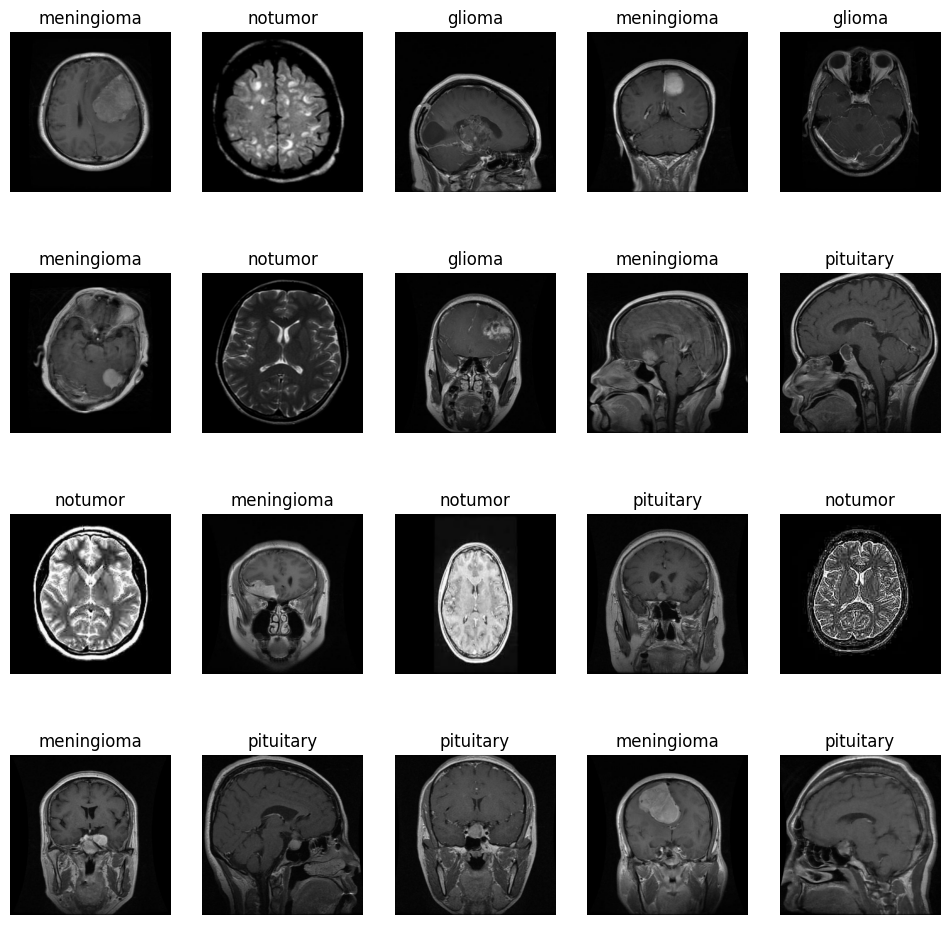

In [ ]:
plt.figure(figsize=(12,12))
for image_batch,label_batch in dataset.take(1):
    for i in range(20):
        ax=plt.subplot(4,5,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

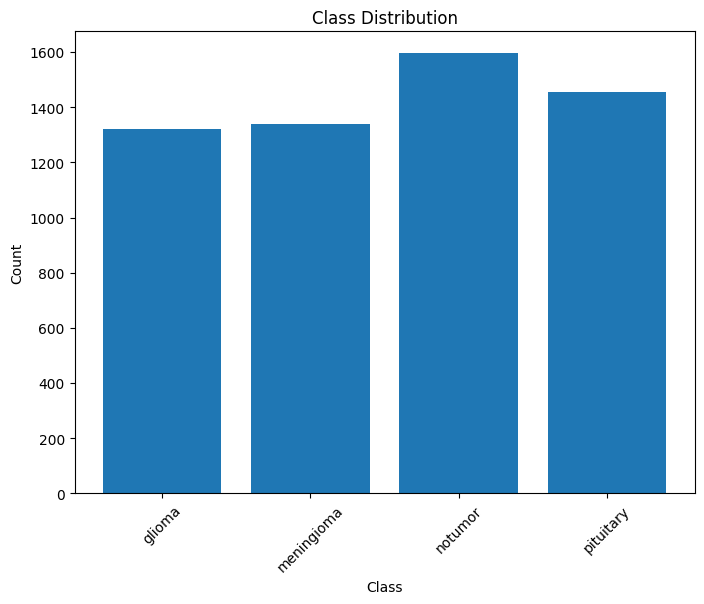

In [ ]:
#It willl perform class distribution
plt.figure(figsize=(8, 6))
class_counts = [0] * len(class_names)
for _, labels in dataset:
    for label in labels.numpy():
        class_counts[label] += 1
plt.bar(class_names, class_counts)
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [ ]:
#Split dataset into train_ds,val_ds,test_ds.
def get_dataset_partition_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=121)
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    return train_ds,val_ds,test_ds

In [ ]:
train_ds,val_ds,test_ds=get_dataset_partition_tf(dataset)

In [ ]:
len(train_ds)

143

In [ ]:
len(val_ds)

17

In [ ]:
len(test_ds)

19

In [ ]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale=tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [ ]:
data_augmentation=tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [ ]:
IMAGE_SIZE

256

In [ ]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=4

In [ ]:
model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
     layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
])
model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_4 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_5 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (32, 4)                │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,812 (718.02 KB)

 Trainable params: 183,812 (718.02 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_ds,batch_size=BATCH_SIZE,validation_data=val_ds,verbose=1,epochs=EPOCHS)

Epoch 1/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 27s 97ms/step - accuracy: 0.4134 - loss: 1.1883 - val_accuracy: 0.6783 - val_loss: 0.8190
Epoch 2/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.7077 - loss: 0.7467 - val_accuracy: 0.7077 - val_loss: 0.7441
Epoch 3/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.7670 - loss: 0.6309 - val_accuracy: 0.7757 - val_loss: 0.6182
Epoch 4/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.7987 - loss: 0.5382 - val_accuracy: 0.7500 - val_loss: 0.5878
Epoch 5/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.7845 - loss: 0.5598 - val_accuracy: 0.7537 - val_loss: 0.6899
Epoch 6/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.8008 - loss: 0.5178 - val_accuracy: 0.8493 - val_loss: 0.4321
Epoch 7/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.8329 - loss: 0.4294 - val_accuracy: 0.8695 - val_loss: 0.3940
Epoch 8/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.8533 - loss: 0.3889 - val_acc

In [ ]:
scores=model.evaluate(test_ds)

19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.9682 - loss: 0.0699


In [ ]:
scores

[0.08415445685386658, 0.9638158082962036]

In [ ]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 143}

In [ ]:
accuracy=history.history['accuracy']
val_accuracy=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']


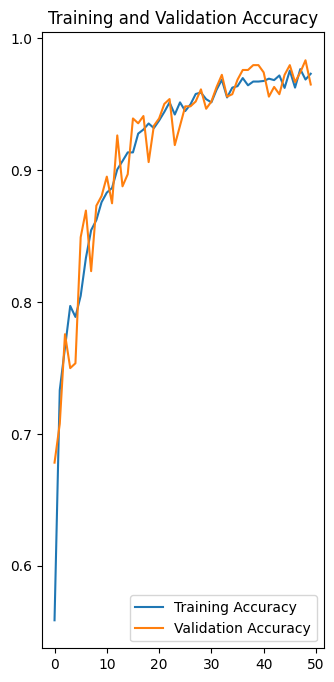

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),accuracy,label='Training Accuracy')
plt.plot(range(EPOCHS),val_accuracy,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title("Training and Validation Accuracy")
plt.show()

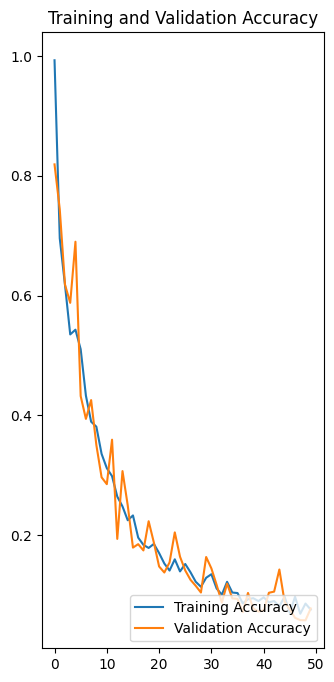

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),loss,label='Training Accuracy')
plt.plot(range(EPOCHS),val_loss,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title("Training and Validation Accuracy")
plt.show()

First Image to predict
Actual Label: meningioma
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted Label: meningioma


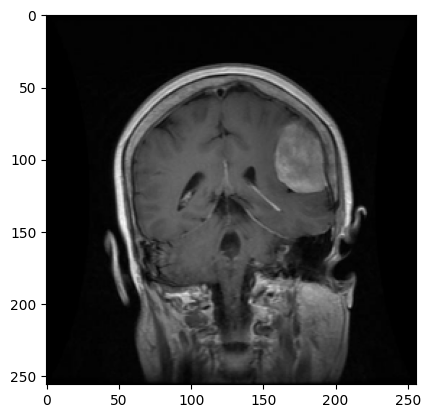

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image=images_batch[0].numpy().astype("uint8")
    print("First Image to predict")
    plt.imshow(first_image)
    print("Actual Label:",class_names[labels_batch[0].numpy()])

    batch_prediction=model.predict(images_batch)
    print("Predicted Label:",class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array,0)

    predictions=model.predict(img_array)

    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


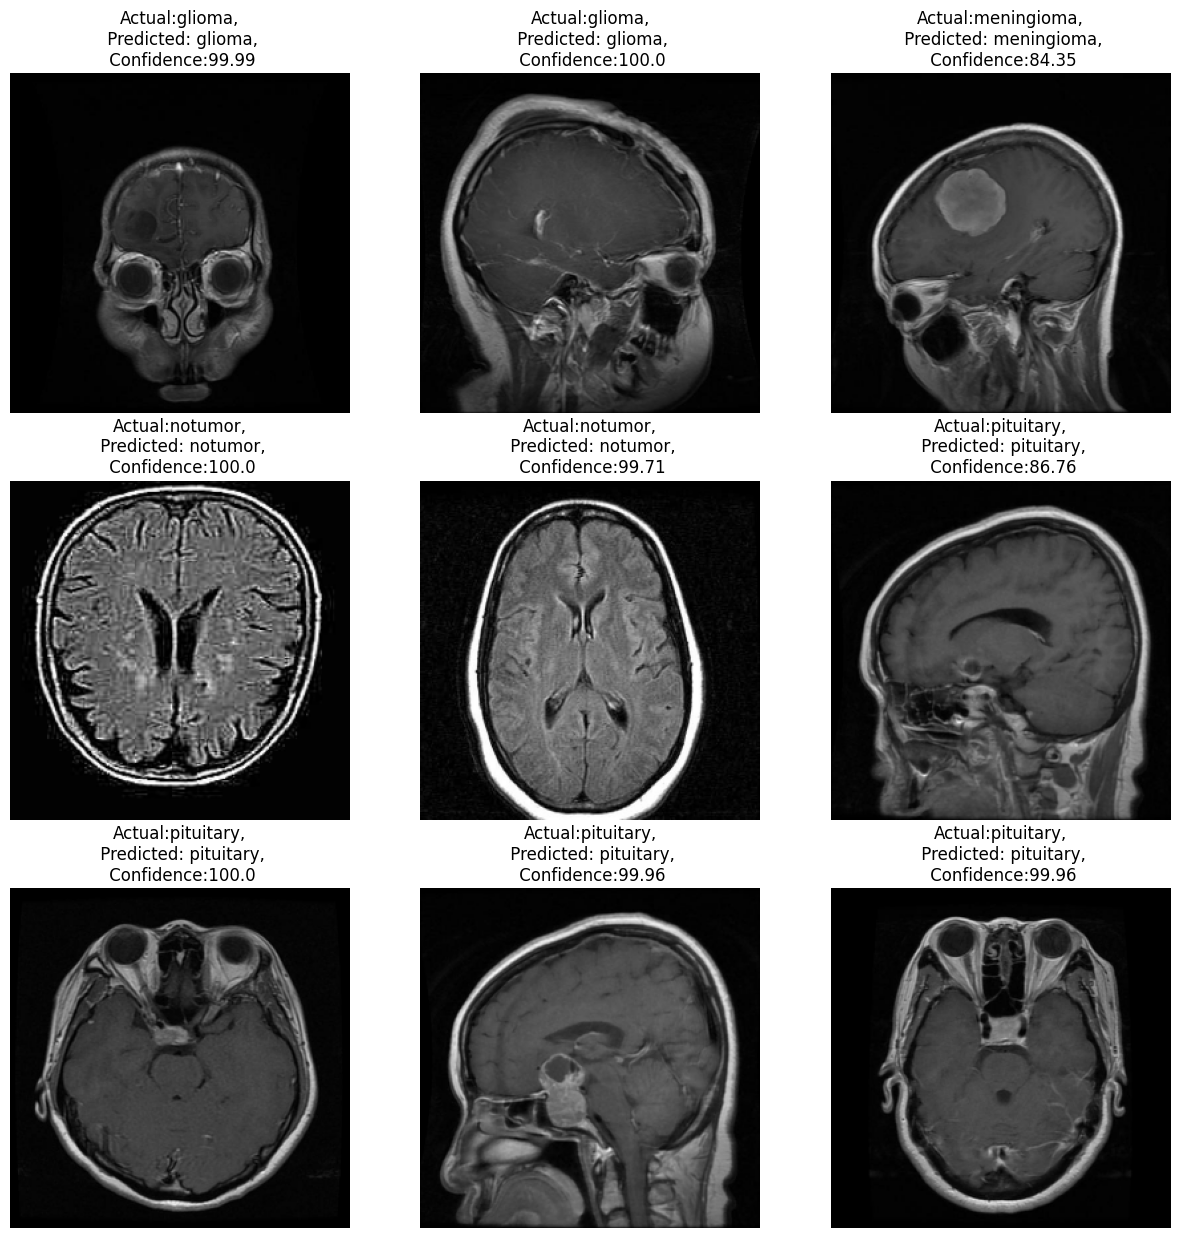

In [ ]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class,confidence=predict(model,images[i].numpy())

        actual_class =class_names[labels[i]]
        plt.title(f"Actual:{actual_class},\n Predicted: {predicted_class},\n Confidence:{confidence}")
        plt.axis("off")